In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as PLT
import seaborn as SB
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
DF = pd.read_csv('../../datasets/BTC-USD.csv',usecols=['Date','Adj Close']).rename(columns={'Date':'date','Adj Close':'price'})

In [3]:
DF['date'] = pd.to_datetime(DF['date'])

In [4]:
DF

,date,price
0,2018-01-01,13657.200195
1,2018-01-02,14982.099609
2,2018-01-03,15201.000000
3,2018-01-04,15599.200195
4,2018-01-05,17429.500000
...,...,...
1283,2021-07-07,33855.328125
1284,2021-07-08,32877.371094
1285,2021-07-09,33798.011719
1286,2021-07-10,33520.519531


In [5]:
GRPS = DF.resample(rule='M', on='date')['price'].mean()
DFM = pd.concat([pd.Series(GRPS.keys()),pd.Series(GRPS.values,name='price')],axis=1)

GRPS = DF.resample(rule='Y', on='date')['price'].mean()
DFY = pd.concat([pd.Series(GRPS.keys()),pd.Series(GRPS.values,name='price')],axis=1)

# sarimax (data must be Stationarity)

### Stationarity: 
#### A stationary time series is one whose properties do not depend on the time at which the series is observed


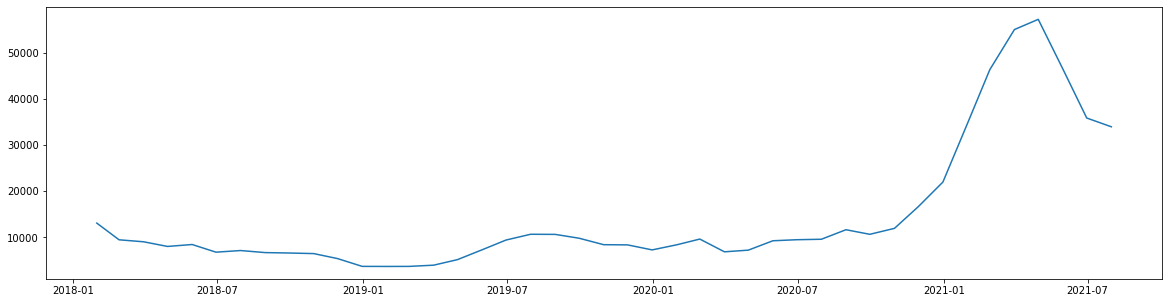

In [6]:
PLT.figure(figsize=(20,5))
PLT.plot(DFM['date'],DFM['price'])
# PLT.plot(DFY['date'],DFY['price'])

In [7]:
AdFuller = adfuller(DFM['price'])[1]
isStationarity = AdFuller < .05

if isStationarity:
    DFM['price'] = np.log(DFM['price'])
AdFuller

0.999071597461384

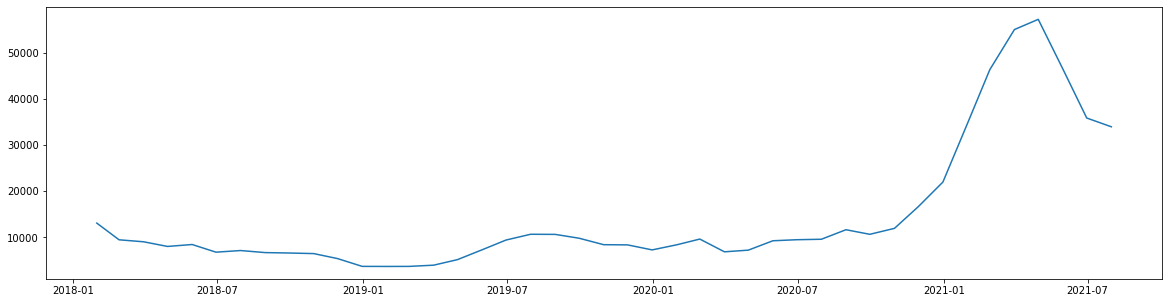

In [8]:
PLT.figure(figsize=(20,5))
PLT.plot(DFM['date'],DFM['price'])

In [9]:
for i in range(0,6):
    DFM['price'] = DFM['price'].diff() #differentiate
    DFM.dropna(inplace=True)

In [10]:
AdFuller = adfuller(DFM['price'])[1]
AdFuller

0.001492763852260694

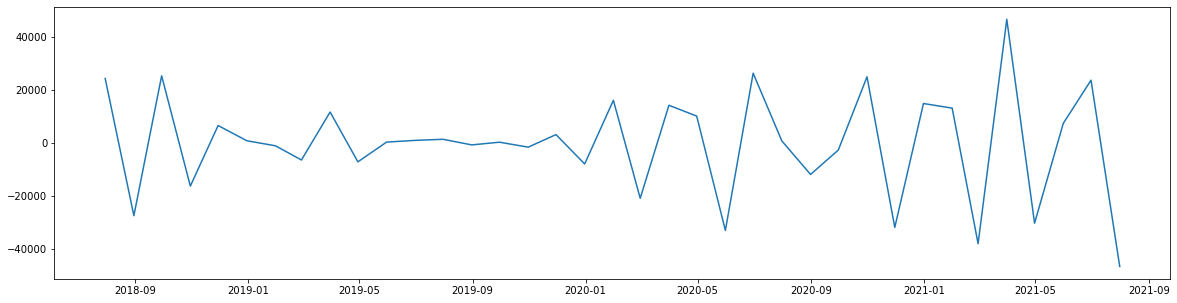

In [11]:
PLT.figure(figsize=(20,5))
PLT.plot(DFM['date'],DFM['price'])

In [49]:
AR = 10 # count of look past data
I = 1 # diff
MA = 10 # count of look past noise data
model = SARIMAX(DF['price'],order=(AR,I,MA)) #,seasonal_order=(3,1,3,  4)
result = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.13582D+00    |proj g|=  1.94327D-01


 This problem is unconstrained.



At iterate    5    f=  8.12269D+00    |proj g|=  2.42414D-02

At iterate   10    f=  8.11141D+00    |proj g|=  3.64426D-02

At iterate   15    f=  8.10917D+00    |proj g|=  1.45443D-02

At iterate   20    f=  8.10669D+00    |proj g|=  1.26252D-02

At iterate   25    f=  8.10573D+00    |proj g|=  8.33700D-03

At iterate   30    f=  8.10557D+00    |proj g|=  9.70442D-03

At iterate   35    f=  8.10538D+00    |proj g|=  8.10975D-03

At iterate   40    f=  8.10525D+00    |proj g|=  8.11288D-03

At iterate   45    f=  8.10489D+00    |proj g|=  3.66103D-02


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.10441D+00    |proj g|=  1.04543D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     50     54      1     0     0   1.045D-02   8.104D+00
  F =   8.1044125684315294     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [50]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                 1288
Model:             SARIMAX(10, 1, 10)   Log Likelihood              -10438.483
Date:                Wed, 16 Nov 2022   AIC                          20918.967
Time:                        09:16:44   BIC                          21027.328
Sample:                             0   HQIC                         20959.645
                               - 1288                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0641      2.879     -0.022      0.982      -5.706       5.578
ar.L2         -0.0558      1.370     -0.041      0.967      -2.740       2.628
ar.L3         -0.6057      0.925     -0.655      0.512      -2.418       1.206
ar.L4          0.3795      1.250      0.304      0.761      -2.070       2.829
ar.L5         -0.2089      1.787     -0.117      0.907      -3.711       3.294
ar.L6          0.0229      1.545      0.015      0.988      -3.005       3.051
ar.L7          0.6865      0.916      0.749      0.454      -1.109       2.482
ar.L8         -0.2456      1.490     -0.165      0.869      -3.166       2.675
ar.L9          0.4173      1.500      0.278      0.781      -2.522       3.357
ar.L10         0.3771      2.031      0.186      0.853      -3.603       4.357
ma.L1          0.0209      2.883      0.007      0.994      -5.629       5.671
ma.L2          0.1490      1.491      0.100      0.920      -2.773       3.071
ma.L3          0.6588      1.259      0.523      0.601      -1.809       3.127
ma.L4         -0.3827      1.233     -0.310      0.756      -2.799       2.034
ma.L5          0.3077      1.781      0.173      0.863      -3.183       3.798
ma.L6          0.0014      1.829      0.001      0.999      -3.583       3.586
ma.L7         -0.7534      0.994     -0.758      0.449      -2.703       1.196
ma.L8          0.1813      1.651      0.110      0.913      -3.055       3.417
ma.L9         -0.4050      1.398     -0.290      0.772      -3.145       2.335
ma.L10        -0.3541      1.947     -0.182      0.856      -4.170       3.461
sigma2      7.113e+05   1.25e+04     56.838      0.000    6.87e+05    7.36e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):              9405.43
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):              11.94   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
DF['sarimax'] = result.fittedvalues

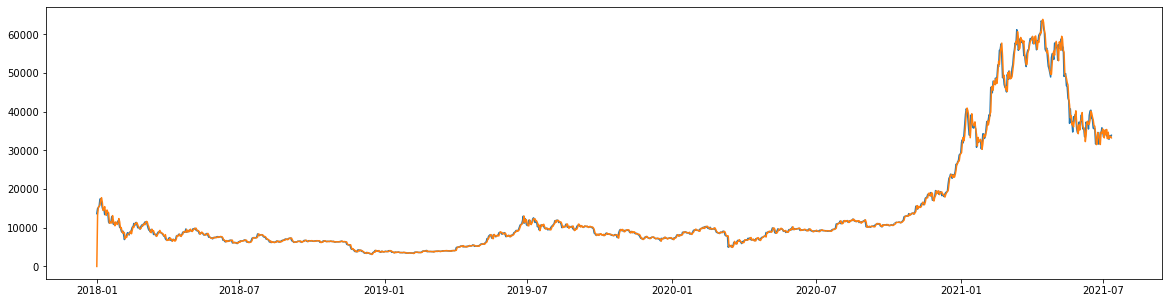

In [59]:
PLT.figure(figsize=(20,5))
PLT.plot(DF['date'],DF['price'])
PLT.plot(DF['date'],DF['sarimax'])